In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Sample - Superstore - Copy.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns

In [5]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [6]:
print( 'Our dataset has', df.shape[0], 'rows and', df.shape[1], 'columns')

Our dataset has 9994 rows and 21 columns


In [7]:
#Give the right data type to ship date column
df['Ship Date']= pd.to_datetime(df['Ship Date'])

In [8]:
df.info

<bound method DataFrame.info of       Row ID        Order ID  Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016 2016-11-11    Second Class   
1          2  CA-2016-152156   11/8/2016 2016-11-11    Second Class   
2          3  CA-2016-138688   6/12/2016 2016-06-16    Second Class   
3          4  US-2015-108966  10/11/2015 2015-10-18  Standard Class   
4          5  US-2015-108966  10/11/2015 2015-10-18  Standard Class   
...      ...             ...         ...        ...             ...   
9989    9990  CA-2014-110422   1/21/2014 2014-01-23    Second Class   
9990    9991  CA-2017-121258   2/26/2017 2017-03-03  Standard Class   
9991    9992  CA-2017-121258   2/26/2017 2017-03-03  Standard Class   
9992    9993  CA-2017-121258   2/26/2017 2017-03-03  Standard Class   
9993    9994  CA-2017-119914    5/4/2017 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute

In [13]:
#Checking for duplicates
duplicates=df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit]
Index: []


We don't have any duplicate values in our data frame

In [20]:
#Checking for missing values
missing_count=df.isnull().count()
missing_percentage=missing_count/len(df)
missing_table=pd.concat([missing_count,missing_percentage], axis=1)
missing_table.columns=['count','missing']
missing_table.sort_values(by='count', ascending=False)

,count,missing
Row ID,9994,1.0
Order ID,9994,1.0
Order Date,9994,1.0
Ship Date,9994,1.0
Ship Mode,9994,1.0
Customer ID,9994,1.0
Customer Name,9994,1.0
Segment,9994,1.0
Country,9994,1.0
City,9994,1.0


In [21]:
columns_with_nan = df.columns[df.isnull().all()]
columns_with_nan

Index([], dtype='object')

In [22]:
#Analyse des variables quantitatives
numeric=['Sales','Quantity','Discount','Profit']
df_num=df[numeric]
df_num.head()

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


In [23]:
summary=df_num.describe()
print(tabulate(summary, headers='keys', tablefmt='fancy_grid', numalign='center'))

╒═══════╤═════════╤════════════╤════════════╤══════════╕
│       │  Sales  │  Quantity  │  Discount  │  Profit  │
╞═══════╪═════════╪════════════╪════════════╪══════════╡
│ count │  9994   │    9994    │    9994    │   9994   │
├───────┼─────────┼────────────┼────────────┼──────────┤
│ mean  │ 229.858 │  3.78957   │  0.156203  │ 28.6569  │
├───────┼─────────┼────────────┼────────────┼──────────┤
│ std   │ 623.245 │  2.22511   │  0.206452  │  234.26  │
├───────┼─────────┼────────────┼────────────┼──────────┤
│ min   │  0.444  │     1      │     0      │ -6599.98 │
├───────┼─────────┼────────────┼────────────┼──────────┤
│ 25%   │  17.28  │     2      │     0      │ 1.72875  │
├───────┼─────────┼────────────┼────────────┼──────────┤
│ 50%   │  54.49  │     3      │    0.2     │  8.6665  │
├───────┼─────────┼────────────┼────────────┼──────────┤
│ 75%   │ 209.94  │     5      │    0.2     │  29.364  │
├───────┼─────────┼────────────┼────────────┼──────────┤
│ max   │ 22638.5 │     14     

Sales


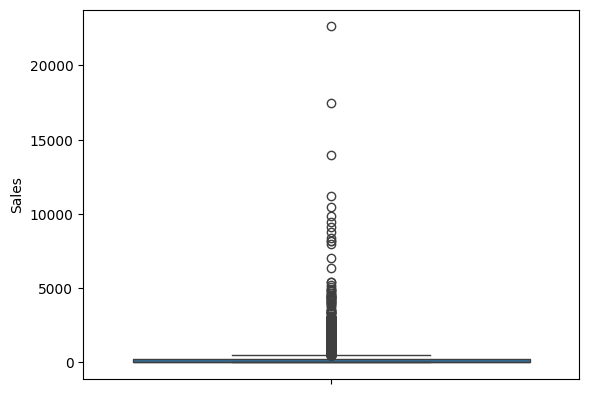

Quantity


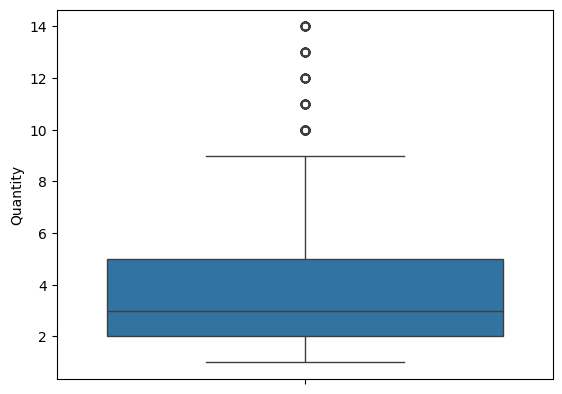

Discount


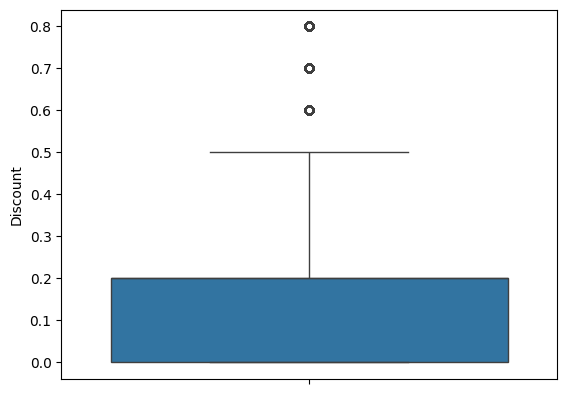

Profit


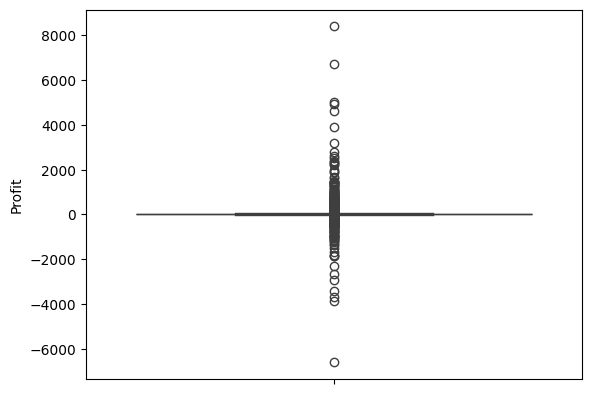

In [24]:
# Distribution of the variable
# 1-Boxplot
for var in df_num:
    print(var)
    sns.boxplot(y=var, data=df_num)
    plt.show()

In [36]:
#Detection of outliers
#Detect outliers by using the isolation forest
from sklearn.ensemble import IsolationForest

# Apply the Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = iso_forest.fit_predict(df_num)

# Ajdd outlier label to the dataframe
df_num['Outlier'] = outlier_labels

# Display the outliers
outliers = df_num[df_num['Outlier'] == -1]
print("Outliers detected:")
print(outliers)

Outliers detected:
          Sales  Quantity  Discount     Profit  Outlier
3      957.5775         5      0.45  -383.0310       -1
10    1706.1840         9      0.20    85.3092       -1
14      68.8100         5      0.80  -123.8580       -1
24    1044.6300         3      0.00   240.2649       -1
27    3083.4300         7      0.50 -1665.0522       -1
...         ...       ...       ...        ...      ...
9942   998.8200         9      0.00    29.9646       -1
9947  1925.8800         6      0.00   539.2464       -1
9948  2405.2000         8      0.00   793.7160       -1
9968   735.9800         2      0.00   331.1910       -1
9979   437.4720        14      0.20   153.1152       -1

[1000 rows x 5 columns]


C:\Users\Yves-Ricky\AppData\Local\Temp\ipykernel_7644\1403773236.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Outlier'] = outlier_labels


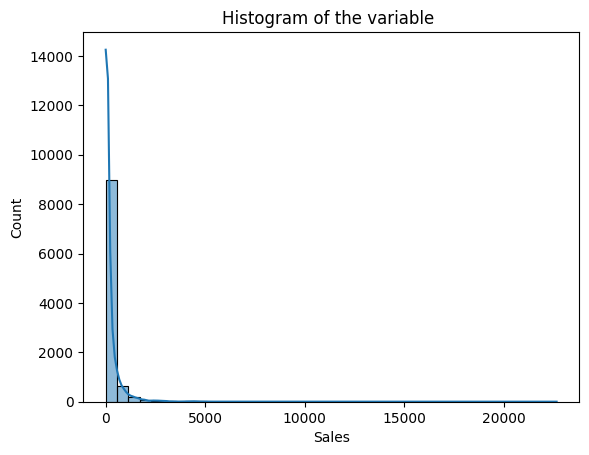

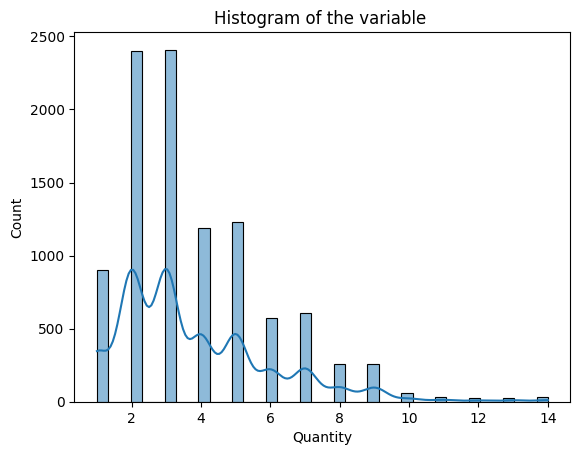

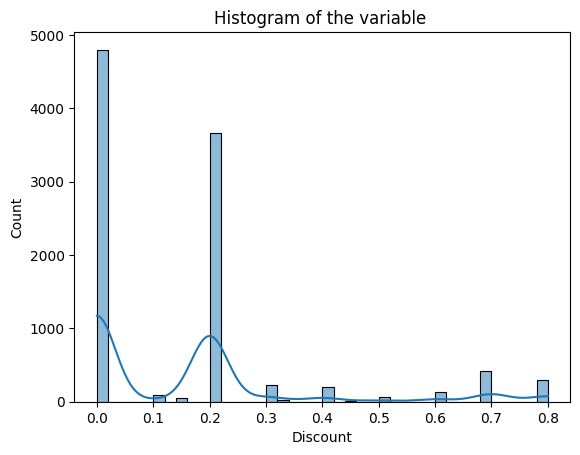

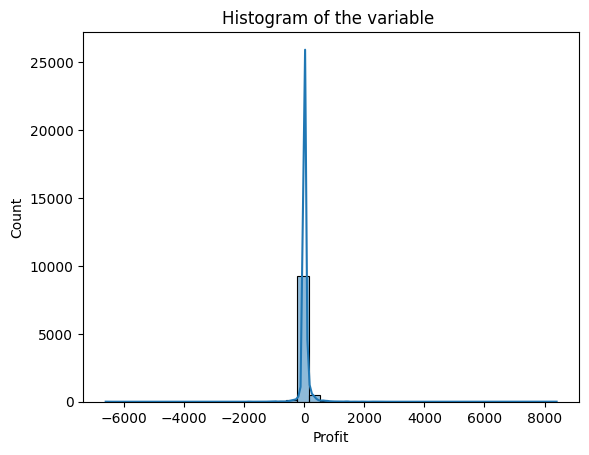

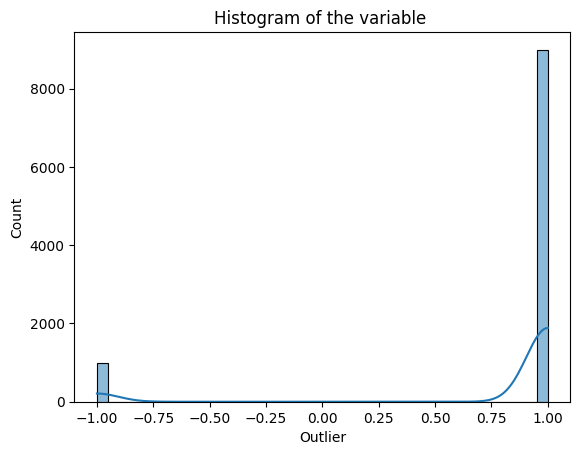

In [44]:
for var in df_num:
    sns.histplot(data=df_num, x=var,bins=40, kde=True)
    plt.title("Histogram of the variable ")
    plt.show()

We do not have a lot of information with these histogram

In [50]:
# Normality tests: We will use kolmogorov smirnov test
import statsmodels.api as sm
from scipy import stats
ks_test_sales=stats.kstest(df_num['Sales'], 'norm')
print('ks_test_sales\n', ks_test_sales)

ks_test_quantity=stats.kstest(df_num['Quantity'], 'norm')
print('ks_test_quantity\n', ks_test_quantity)

ks_test_Discount=stats.kstest(df_num['Discount'], 'norm')
print('ks_test_Discount\n', ks_test_Discount)

ks_test_profit=stats.kstest(df_num['Profit'], 'norm')
print('ks_test_profit\n', ks_test_profit)

ks_test_sales
 KstestResult(statistic=np.float64(0.9820648440401365), pvalue=np.float64(0.0), statistic_location=np.float64(2.61), statistic_sign=np.int8(-1))
ks_test_quantity
 KstestResult(statistic=np.float64(0.8872958956683907), pvalue=np.float64(0.0), statistic_location=np.int64(2), statistic_sign=np.int8(-1))
ks_test_Discount
 KstestResult(statistic=np.float64(0.5), pvalue=np.float64(0.0), statistic_location=np.float64(0.0), statistic_sign=np.int8(-1))
ks_test_profit
 KstestResult(statistic=np.float64(0.7179722426806663), pvalue=np.float64(0.0), statistic_location=np.float64(2.128), statistic_sign=np.int8(-1))


We do not have any normal distribution between our features

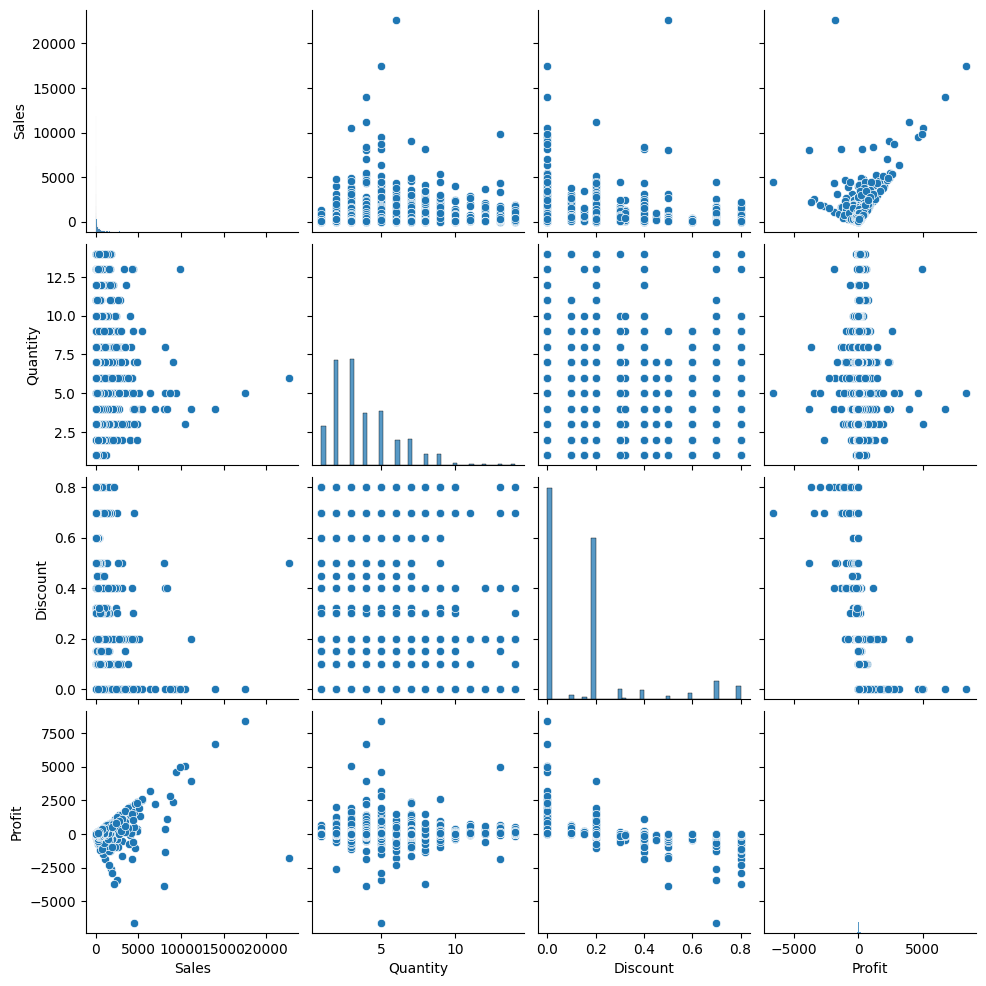

In [57]:
# Quantitative bivariate analysis
del df_num['Outlier']
sns.pairplot(df_num, kind='scatter')

<Axes: >

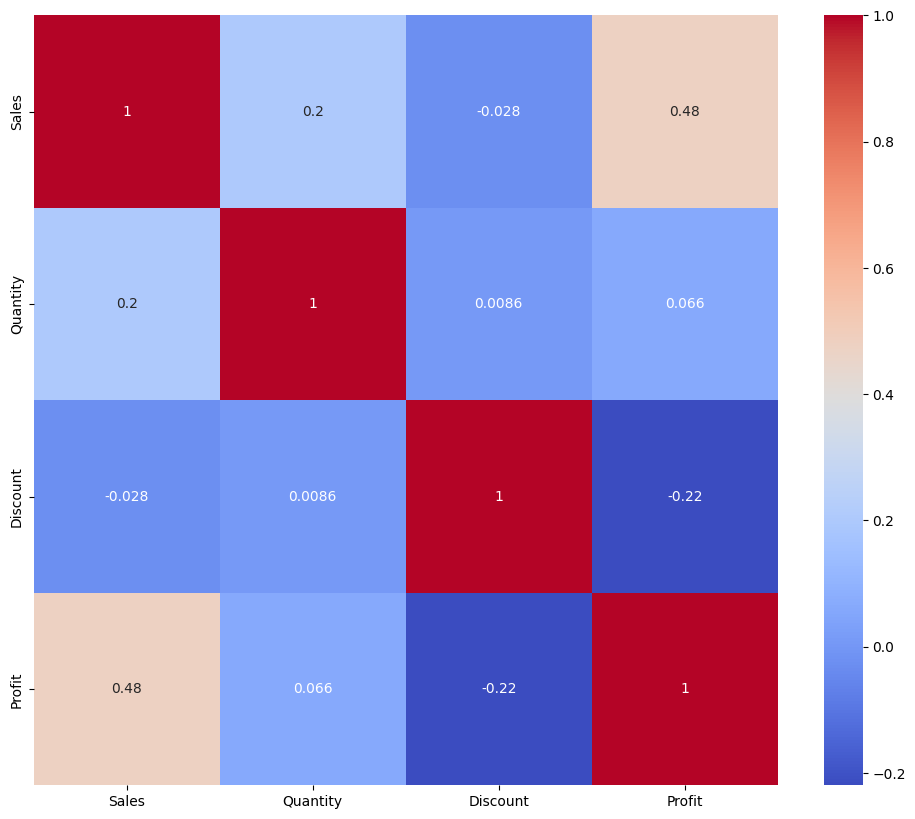

In [59]:
#Correlation matrix

corr_matrix = df_num.corr()

plt.figure(figsize=(12, 10))
# Display the as heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

We do not see any strong correlation between our numeric variables

In [77]:
# Bivariate qualitative analysis
cat_vars=['Ship Mode', 'Segment','Country','City','State','Region','Category','Sub-Category','Product Name']
df[cat_vars].head()
df_cat=df[cat_vars]
df_cat.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


In [85]:
#Get the count of each category
for var in df_cat:
    print(df_cat[var].value_counts())

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64
Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64
Country
United States    9994
Name: count, dtype: int64
City
New York City        915
Los Angeles          747
Philadelphia         537
San Francisco        510
Seattle              428
                    ... 
Montebello             1
Normal                 1
Arlington Heights      1
Springdale             1
San Luis Obispo        1
Name: count, Length: 531, dtype: int64
State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee           